In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
train_history1 = pd.read_csv('./training-300-epochs/train_history.csv')
val_history1 = pd.read_csv('./training-300-epochs/val_history.csv')
train_history = pd.read_csv('./train_history.csv?token=ANURXIY62YUMPD2XQGXMWX26EPHGK')
val_history = pd.read_csv('./val_history.csv?token=ANURXI3ME6IRQQQFSOSQ6DC6EPHEY')

### Plot training and validation loss

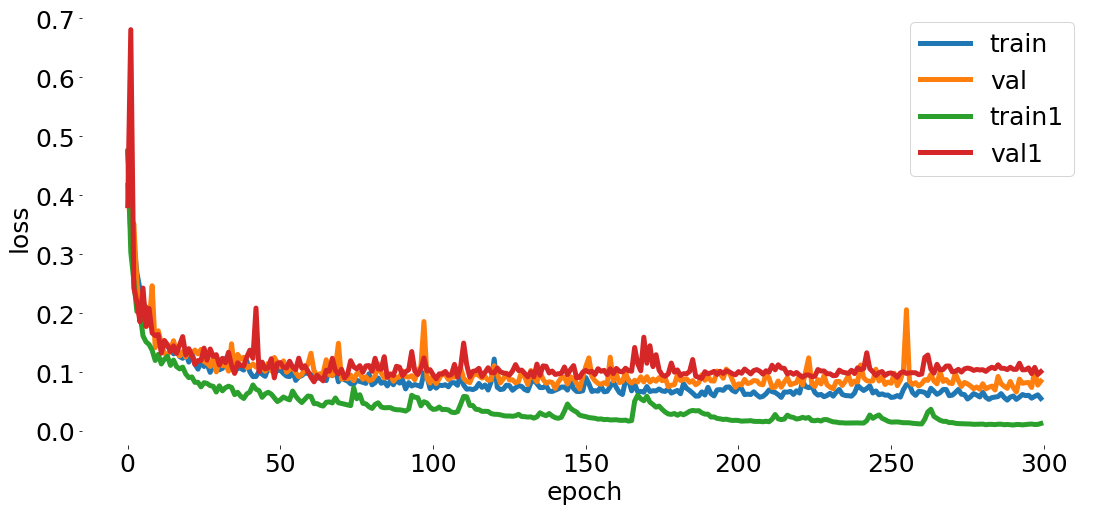

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.rcParams.update({'font.size': 25})
plt.plot(train_history, linewidth=5, label='train')
plt.plot(val_history, linewidth=5, label='val')
plt.plot(train_history1, linewidth=5, label='train1')
plt.plot(val_history1, linewidth=5, label='val1')
plt.legend()
#plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.box('off')
plt.show()

### See images and predictions

In [8]:
import pickle as pkl
with open('/home/adri/Studies/PhD_UCD/notebooks/activations-5th-training/activations-0-X.pkl', 'rb') as pickle_file:
    X = pkl.load(pickle_file)
with open('/home/adri/Studies/PhD_UCD/notebooks/activations-5th-training/activations-0-Y.pkl', 'rb') as pickle_file:
    Y = pkl.load(pickle_file)    
with open('/home/adri/Studies/PhD_UCD/notebooks/activations-5th-training/activations-0-Y_hat.pkl', 'rb') as pickle_file:
    Y_hat = pkl.load(pickle_file)    

In [9]:
import numpy as np
print(np.shape(X))
print(np.shape(Y))
print(np.shape(Y_hat))

(11, 1, 348, 348)
(11, 1, 348, 348)
(11, 164, 164)


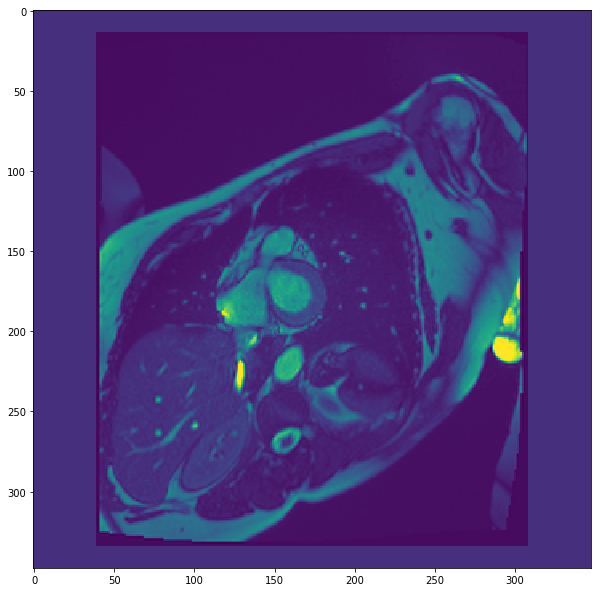

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
plt.imshow(X[0][0])
plt.show()

In [11]:
np.shape(X)

(11, 1, 348, 348)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d

montage3d = lambda x, **k: montage2d(np.stack([montage2d(y, **k) for y in x], 0))

def plot_patient_slices_3d(patient_slices, title=False, figsize=(20, 20)):
    '''Plots a 2D image per slice in series (3D in total)'''
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    image = montage2d(patient_slices)
    if title: ax.set_title(title)
    ax.imshow(image, cmap='bone')


def plot_patient_data_4d(patient_data, all_slices=True, num_slices=[0,1,2], figsize=(20, 20)):
    '''Plots a 3D image per time step in patient data (4D in total)'''
    if all_slices:
        # Number of slices is equal to the first dimension of the patient image array
        num_slices = range(patient_data.shape[0])
    for i in num_slices:
        plot_patient_slices_3d(patient_data[i],
                               title=('Showing slice %i' % i))

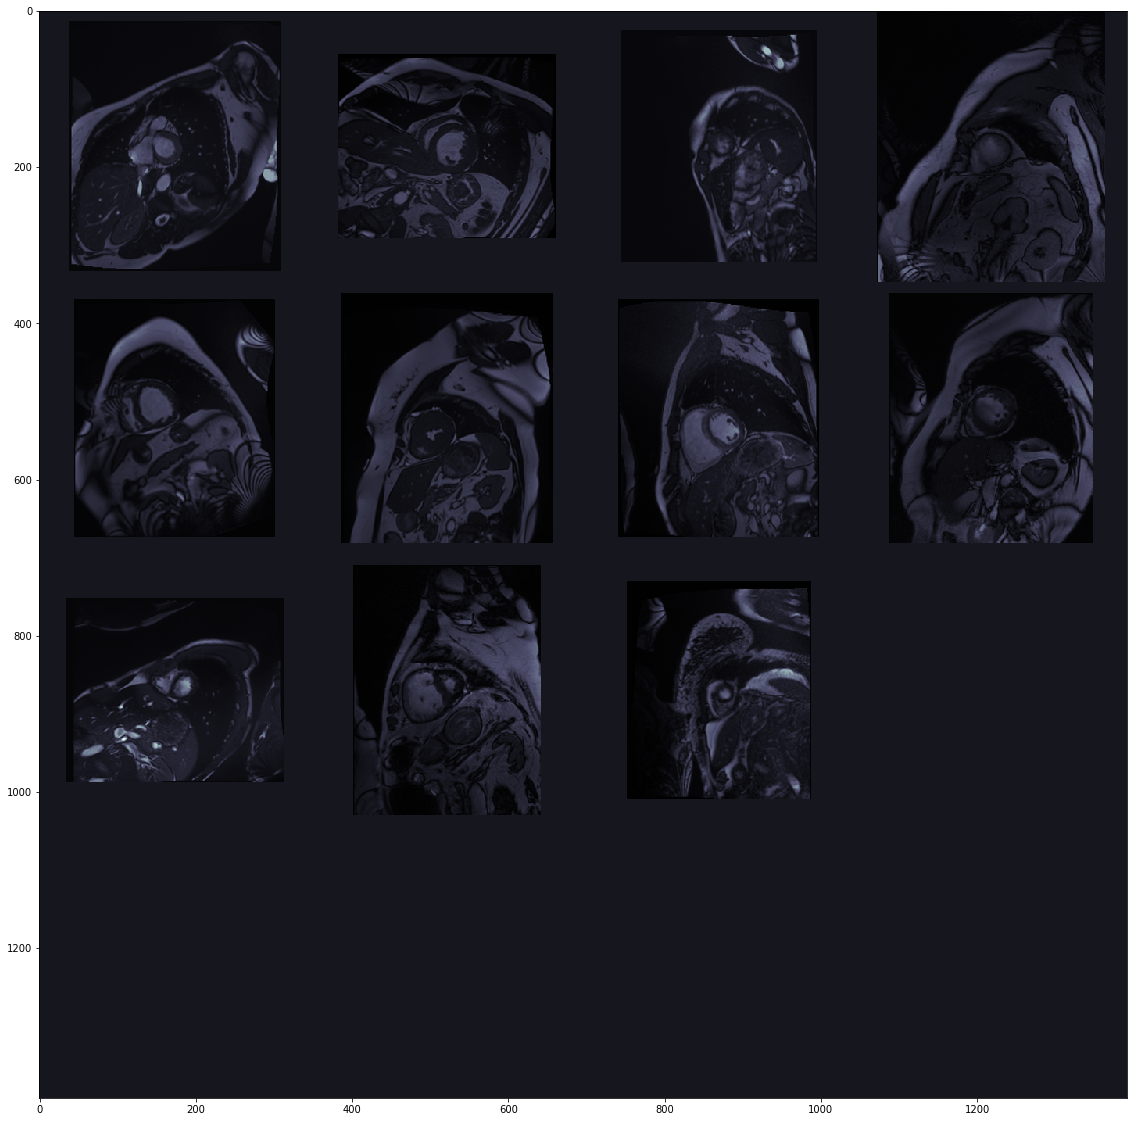

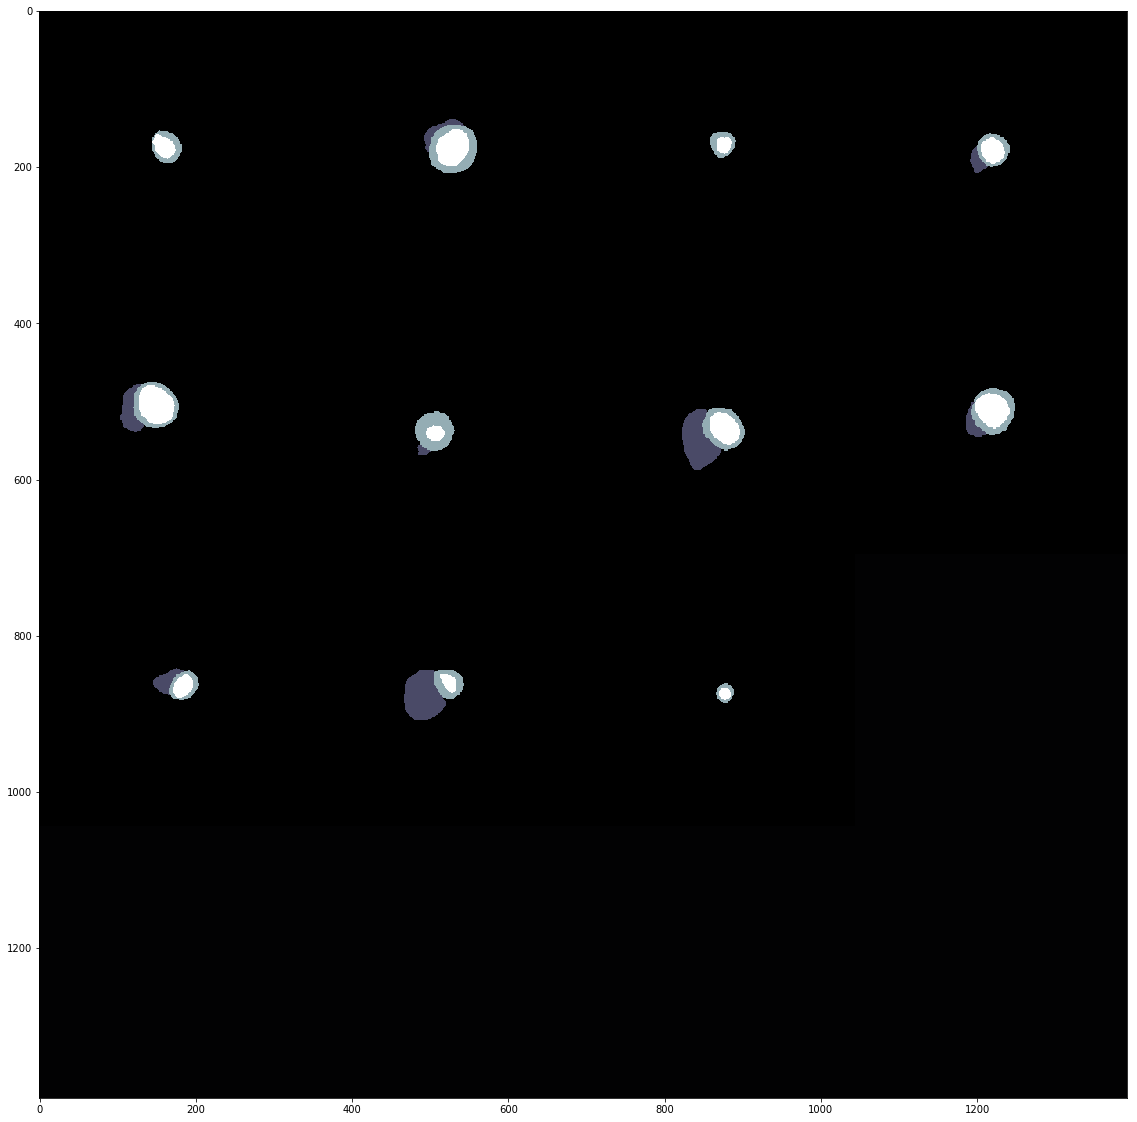

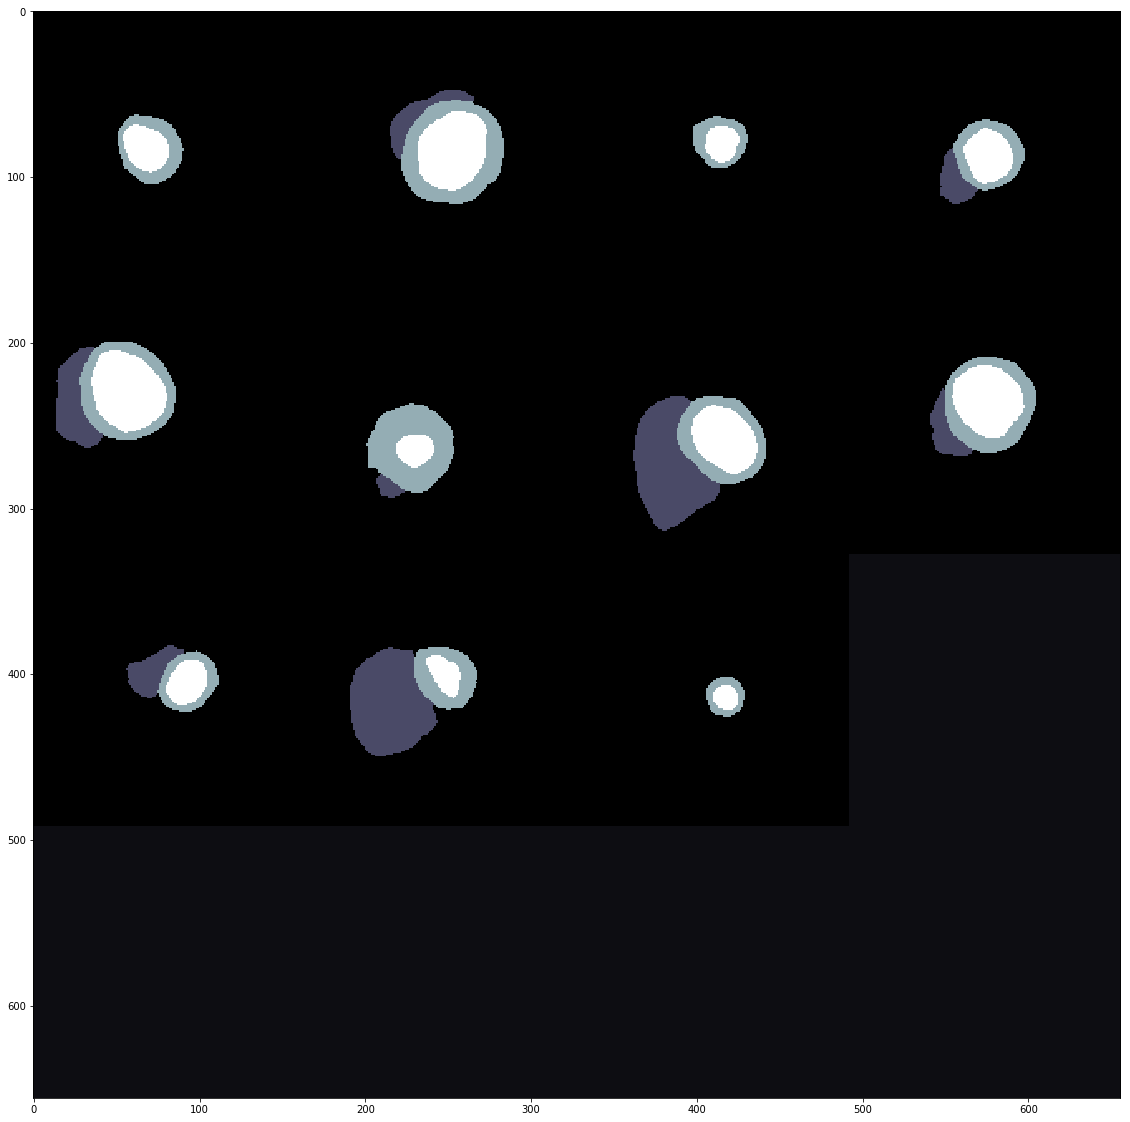

In [13]:
plot_patient_slices_3d(X.reshape((11,348,348)))
plot_patient_slices_3d(Y.reshape((11,348,348)))
plot_patient_slices_3d(Y_hat)

In [68]:
np.shape(Y_hat[0])

(164, 164)

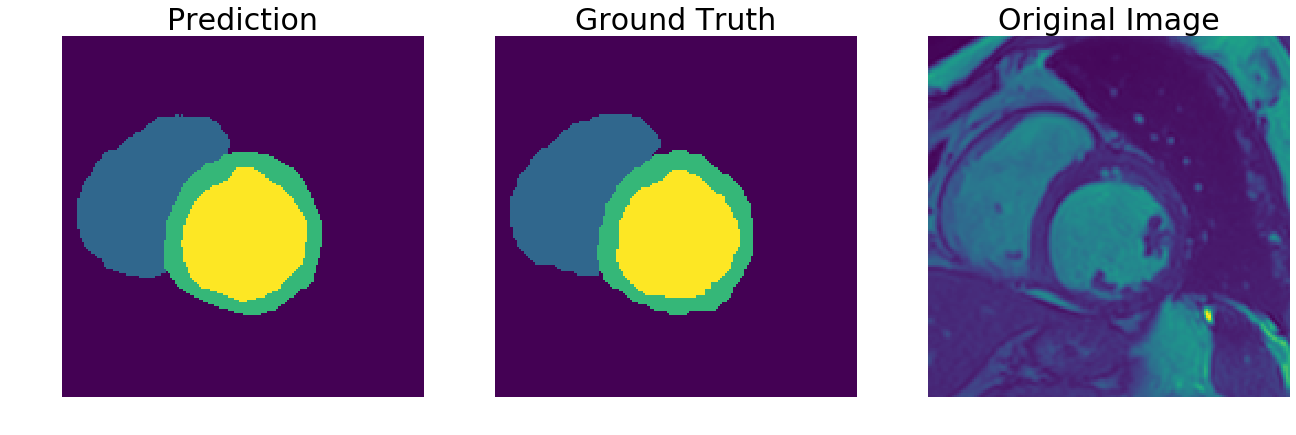

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(22,10))
axs[0].imshow(Y_hat[0])
axs[0].title.set_text('Prediction')
axs[0].axis('off')
axs[1].imshow(Y[0].reshape(348,348)[92:-92,92:-92])
axs[1].title.set_text('Ground Truth')
axs[1].axis('off')
axs[2].imshow(X[0].reshape(348,348)[92:-92,92:-92])
axs[2].title.set_text('Original Image')
axs[2].axis('off')
plt.show()

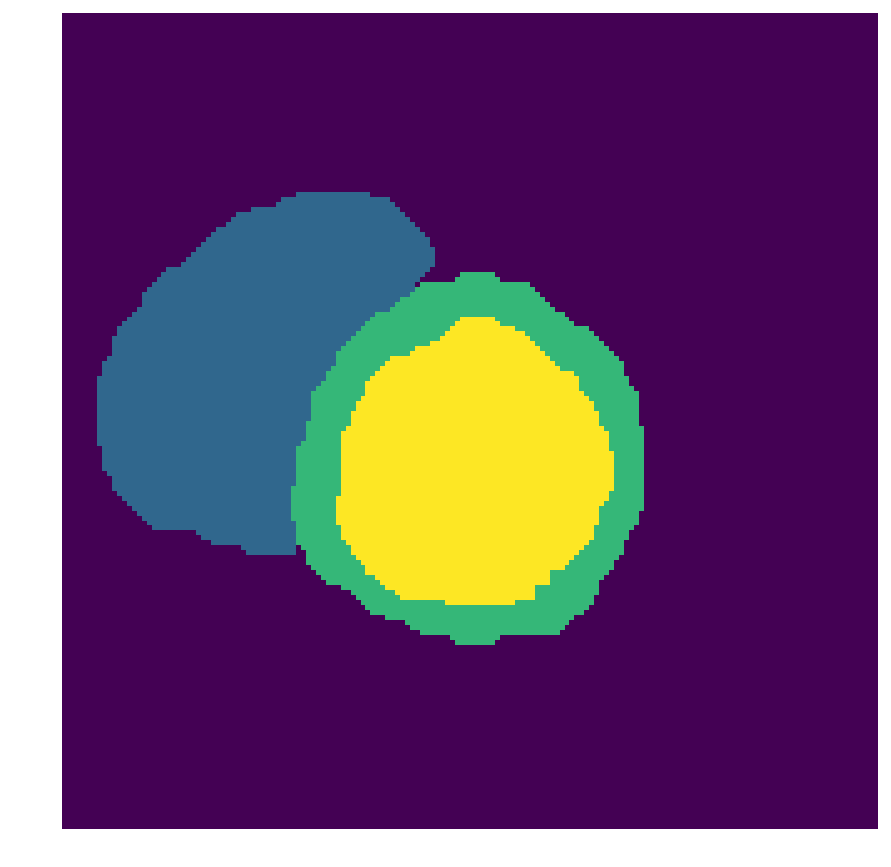

In [66]:
plt.figure(figsize=(15,15))
plt.imshow(Y[0].reshape(348,348)[92:-92,92:-92])
plt.axis("off")
plt.show()

In [59]:
np.shape(Y)

(11, 1, 348, 348)

In [ ]:
import SimpleITK as sitk

id_ = 0
ed_fname = "./patient%03.0d_ED.nii.gz" % id_
es_fname = "./patient%03.0d_ES.nii.gz" % id_

sitk.WriteImage(Y, ed_fnameame)
sitk.WriteImage(Y_hat, ed_fnameame)

# fname = os.path.join(patient_folder, "patient%03.0d_frame%02.0d.nii.gz" % (id, patient_info[id]['ed']))
# if os.path.isfile(fname):
#     images["ed"] = sitk.ReadImage(fname)
# fname = os.path.join(patient_folder, "patient%03.0d_frame%02.0d_gt.nii.gz" % (id, patient_info[id]['ed']))
# if os.path.isfile(fname):
#     images["ed_seg"] = sitk.ReadImage(fname)